# WDSA-CCWI 2022
# <font color='blue'> TSNet Short Tutorial
 

## Example 7: TNet3 - Burst with different friction models

In this example we will use Tnet3 to demonstrate the effect of the three friction models: steady, quasi-steady, and unsteady.


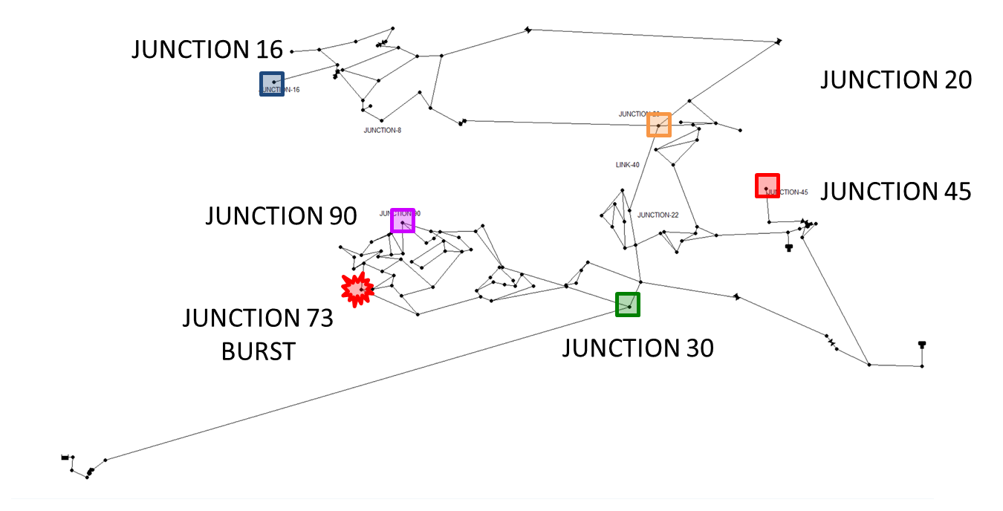

### Import packages

In [1]:
import tsnet
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

### Burst event at JUNCTION-73 with steady friction

In [2]:
start = datetime.now()
# open an example network and create a transient model
#-------------------------------------------------
inp_file = 'networks/Tnet3.inp'
tm = tsnet.network.TransientModel(inp_file)

# Set wavespeed
#-------------------------------------------------
wavespeed = 1200
tm.set_wavespeed(wavespeed)

# Set time step
#-------------------------------------------------
tf = 20 # simulation period [s]
tm.set_time(tf)

# Add burst
#-------------------------------------------------
ts = 1 # burst start time
tc = 1 # time for burst to fully develop
final_burst_coeff = 0.01 # final burst coeff [ m^3/s/(m H20)^(1/2)]
tm.add_burst('JUNCTION-73', ts, tc, final_burst_coeff)

# Initialize steady state simulation
#-------------------------------------------------
t0 = 0. # initialize the simulation at 0s
engine = 'DD' # or Epanet
tm = tsnet.simulation.Initializer(tm, t0, engine)

# Transient simulation
result_obj = 'Tnet3_sf' # name of the object for saving simulation results
tm_sf = tsnet.simulation.MOCSimulator(tm,result_obj)
sim_time = datetime.now() - start
print('Actual simulation time for steady friction %s' %sim_time)

C:\Users\ps28866\AppData\Local\Continuum\anaconda3\envs\tsnet\lib\site-packages\wntr\epanet\io.py:2085: UserWarning: Not all curves were used in "networks/Tnet3.inp"; added with type None, units conversion left to user
  warnings.warn('Not all curves were used in "{}"; added with type None, units conversion left to user'.format(self.wn.name))


Simulation time step 0.01154 s
Total Time Step in this simulation 1732
Estimated simulation time 0:01:39.513792
Transient simulation completed 9 %...
Transient simulation completed 19 %...
Transient simulation completed 29 %...
Transient simulation completed 39 %...
Transient simulation completed 49 %...
Transient simulation completed 59 %...
Transient simulation completed 69 %...
Transient simulation completed 79 %...
Transient simulation completed 89 %...
Transient simulation completed 99 %...
Actual simulation time for steady friction 0:02:21.328029


### Burst event at JUNCTION-73 with quasi-steady friction

In [3]:
start = datetime.now()
tm = tsnet.network.TransientModel(inp_file)

# Set wavespeed
#-------------------------------------------------
tm.set_wavespeed(wavespeed)

# Set time step
#-------------------------------------------------
tf = 20 # simulation period [s]
tm.set_time(tf)

# Add burst
#-------------------------------------------------
ts = 1 # burst start time
tc = 1 # time for burst to fully develop
final_burst_coeff = 0.01 # final burst coeff [ m^3/s/(m H20)^(1/2)]
tm.add_burst('JUNCTION-73', ts, tc, final_burst_coeff)

# Initialize steady state simulation
#-------------------------------------------------
t0 = 0. # initialize the simulation at 0s
engine = 'DD' # or Epanet
tm = tsnet.simulation.Initializer(tm, t0, engine)

# Transient simulation
#-------------------------------------------------
result_obj = 'Tnet3_qsf' # name of the object for saving simulation results
friction ='quasi-steady'
tm_qsf = tsnet.simulation.MOCSimulator(tm,result_obj,friction)
sim_time = datetime.now() - start
print('Actual simulation time for quasi-steady friction %s' %sim_time)

Simulation time step 0.01154 s
Total Time Step in this simulation 1732
Estimated simulation time 0:03:21.002064
Transient simulation completed 9 %...
Transient simulation completed 19 %...
Transient simulation completed 29 %...
Transient simulation completed 39 %...
Transient simulation completed 49 %...
Transient simulation completed 59 %...
Transient simulation completed 69 %...
Transient simulation completed 79 %...
Transient simulation completed 89 %...
Transient simulation completed 99 %...
Actual simulation time for quasi-steady friction 0:03:25.001765


### Burst event at JUNCTION-73 with unsteady friction

In [4]:
start = datetime.now()
# Set wavespeed
#-------------------------------------------------
tm = tsnet.network.TransientModel(inp_file)
tm.set_wavespeed(wavespeed)

# Set time step
#-------------------------------------------------
tf = 20 # simulation period [s]
tm.set_time(tf)

# Add burst
#-------------------------------------------------
ts = 1 # burst start time
tc = 1 # time for burst to fully develop
final_burst_coeff = 0.01 # final burst coeff [ m^3/s/(m H20)^(1/2)]
tm.add_burst('JUNCTION-73', ts, tc, final_burst_coeff)

# Initialize steady state simulation
#-------------------------------------------------
t0 = 0. # initialize the simulation at 0s
engine = 'DD' # or Epanet
tm = tsnet.simulation.Initializer(tm, t0, engine)

# Transient simulation
#-------------------------------------------------
result_obj = 'Tnet3_usf' # name of the object for saving simulation results
friction ='unsteady'
tm_usf = tsnet.simulation.MOCSimulator(tm,result_obj,friction)
sim_time = datetime.now() - start
print('Actual simulation time for unsteady friction %s' %sim_time)

Simulation time step 0.01154 s
Total Time Step in this simulation 1732
Estimated simulation time 0:06:05.836504
Transient simulation completed 9 %...
Transient simulation completed 19 %...
Transient simulation completed 29 %...
Transient simulation completed 39 %...
Transient simulation completed 49 %...
Transient simulation completed 59 %...
Transient simulation completed 69 %...
Transient simulation completed 79 %...
Transient simulation completed 89 %...
Transient simulation completed 99 %...
Actual simulation time for unsteady friction 0:05:20.830148


### Get results

- Plot steady and usteady friction

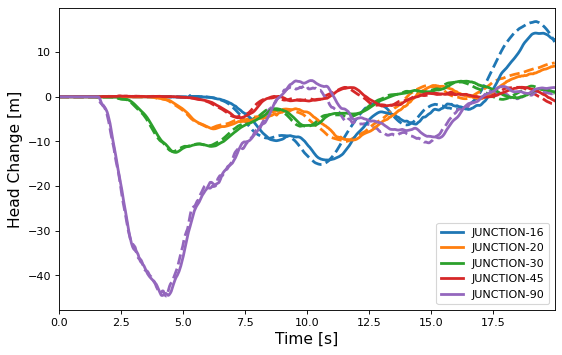

In [5]:
node1 = 'JUNCTION-16'
node2 = 'JUNCTION-20'
node3 = 'JUNCTION-30'
node4 = 'JUNCTION-45'
node5 = 'JUNCTION-90'
fig = plt.figure(figsize=(8,5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(tm_sf.simulation_timestamps,tm_sf.get_node(node1).head-tm_sf.get_node(node1).head[0],'C0--', linewidth=2.5)
plt.plot(tm_sf.simulation_timestamps,tm_sf.get_node(node2).head-tm_sf.get_node(node2).head[0],'C1--', linewidth=2.5)
plt.plot(tm_sf.simulation_timestamps,tm_sf.get_node(node3).head-tm_sf.get_node(node3).head[0],'C2--', linewidth=2.5)
plt.plot(tm_sf.simulation_timestamps,tm_sf.get_node(node4).head-tm_sf.get_node(node4).head[0],'C3--', linewidth=2.5)
plt.plot(tm_sf.simulation_timestamps,tm_sf.get_node(node5).head-tm_sf.get_node(node5).head[0],'C4--', linewidth=2.5)

plt.plot(tm_usf.simulation_timestamps,tm_usf.get_node(node1).head-tm_usf.get_node(node1).head[0],'C0', label='JUNCTION-16', linewidth=2.5)
plt.plot(tm_usf.simulation_timestamps,tm_usf.get_node(node2).head-tm_usf.get_node(node2).head[0],'C1', label='JUNCTION-20', linewidth=2.5)
plt.plot(tm_usf.simulation_timestamps,tm_usf.get_node(node3).head-tm_usf.get_node(node3).head[0],'C2', label='JUNCTION-30', linewidth=2.5)
plt.plot(tm_usf.simulation_timestamps,tm_usf.get_node(node4).head-tm_usf.get_node(node4).head[0],'C3', label='JUNCTION-45', linewidth=2.5)
plt.plot(tm_usf.simulation_timestamps,tm_usf.get_node(node5).head-tm_usf.get_node(node5).head[0],'C4', label='JUNCTION-90', linewidth=2.5)

plt.xlim([tm_sf.simulation_timestamps[0],tm_sf.simulation_timestamps[-1]])
plt.xlabel("Time [s]", fontsize=14)
plt.ylabel("Head Change [m]", fontsize=14)
plt.legend(loc='lower right')
plt.show()
fig.savefig('./networks/Tnet3_burst_friction_models_a.pdf', format='pdf',dpi=100)

- Plot steady, quasi-steady, and undsteady friction results

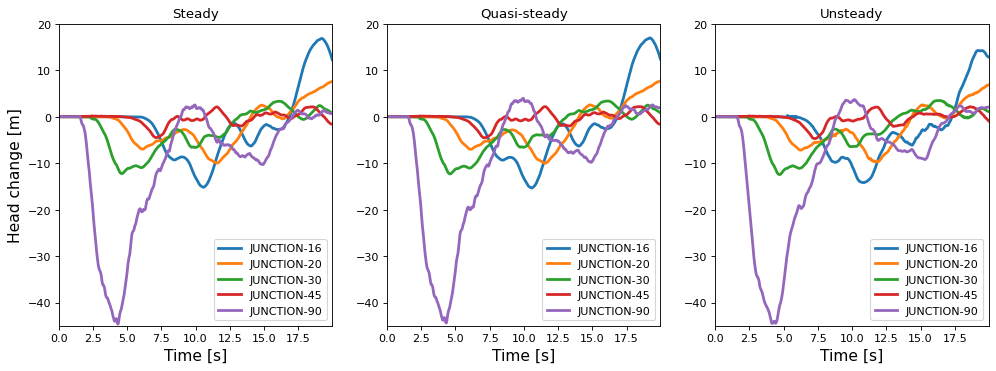

<Figure size 432x288 with 0 Axes>

In [6]:
node1 = 'JUNCTION-16'
node2 = 'JUNCTION-20'
node3 = 'JUNCTION-30'
node4 = 'JUNCTION-45'
node5 = 'JUNCTION-90'
fig, axs = plt.subplots(1,3,figsize=(15,5), dpi=80, facecolor='w', edgecolor='k')
axs[0].plot(tm_sf.simulation_timestamps,tm_sf.get_node(node1).head-tm_sf.get_node(node1).head[0],'C0',label='JUNCTION-16', linewidth=2.5)
axs[0].plot(tm_sf.simulation_timestamps,tm_sf.get_node(node2).head-tm_sf.get_node(node2).head[0],'C1',label='JUNCTION-20', linewidth=2.5)
axs[0].plot(tm_sf.simulation_timestamps,tm_sf.get_node(node3).head-tm_sf.get_node(node3).head[0],'C2', label='JUNCTION-30',linewidth=2.5)
axs[0].plot(tm_sf.simulation_timestamps,tm_sf.get_node(node4).head-tm_sf.get_node(node4).head[0],'C3', label='JUNCTION-45',linewidth=2.5)
axs[0].plot(tm_sf.simulation_timestamps,tm_sf.get_node(node5).head-tm_sf.get_node(node5).head[0],'C4',label='JUNCTION-90', linewidth=2.5)
axs[0].set_xlim([tm_sf.simulation_timestamps[0],tm_sf.simulation_timestamps[-1]])
axs[0].set_ylim([-45,20])
axs[0].set_xlabel("Time [s]", fontsize=14)
axs[0].set_ylabel("Head change [m]", fontsize=14)
axs[0].legend(loc='lower right')
axs[0].set_title('Steady')

axs[1].plot(tm_qsf.simulation_timestamps,tm_qsf.get_node(node1).head-tm_qsf.get_node(node1).head[0],'C0',label='JUNCTION-16', linewidth=2.5)
axs[1].plot(tm_qsf.simulation_timestamps,tm_qsf.get_node(node2).head-tm_qsf.get_node(node2).head[0],'C1',label='JUNCTION-20', linewidth=2.5)
axs[1].plot(tm_qsf.simulation_timestamps,tm_qsf.get_node(node3).head-tm_qsf.get_node(node3).head[0],'C2',label='JUNCTION-30', linewidth=2.5)
axs[1].plot(tm_qsf.simulation_timestamps,tm_qsf.get_node(node4).head-tm_qsf.get_node(node4).head[0],'C3',label='JUNCTION-45', linewidth=2.5)
axs[1].plot(tm_qsf.simulation_timestamps,tm_qsf.get_node(node5).head-tm_qsf.get_node(node5).head[0],'C4',label='JUNCTION-90', linewidth=2.5)
axs[1].set_xlim([tm_sf.simulation_timestamps[0],tm_sf.simulation_timestamps[-1]])
axs[1].set_ylim([-45,20])
axs[1].set_xlabel("Time [s]", fontsize=14)
axs[1].legend(loc='lower right')
axs[1].set_title('Quasi-steady')

axs[2].plot(tm_usf.simulation_timestamps,tm_usf.get_node(node1).head-tm_usf.get_node(node1).head[0],'C0',label='JUNCTION-16', linewidth=2.5)
axs[2].plot(tm_usf.simulation_timestamps,tm_usf.get_node(node2).head-tm_usf.get_node(node2).head[0],'C1',label='JUNCTION-20', linewidth=2.5)
axs[2].plot(tm_usf.simulation_timestamps,tm_usf.get_node(node3).head-tm_usf.get_node(node3).head[0],'C2',label='JUNCTION-30', linewidth=2.5)
axs[2].plot(tm_usf.simulation_timestamps,tm_usf.get_node(node4).head-tm_usf.get_node(node4).head[0],'C3',label='JUNCTION-45', linewidth=2.5)
axs[2].plot(tm_usf.simulation_timestamps,tm_usf.get_node(node5).head-tm_usf.get_node(node5).head[0],'C4',label='JUNCTION-90', linewidth=2.5)
axs[2].set_xlim([tm_sf.simulation_timestamps[0],tm_sf.simulation_timestamps[-1]])
axs[2].set_xlabel("Time [s]", fontsize=14)
axs[2].set_ylim([-45,20])
axs[2].legend(loc='lower right')
axs[2].set_title('Unsteady')

plt.show()
plt.tight_layout()
fig.savefig('./networks/Tnet3_burst_friction_models_b.pdf', format='pdf',dpi=100)